# Blatt 6

## Aufgabe 1 Zufallszahlentests

Betrachte die folgenden (Pseudo-)Zufallszahlengeneratoren

(A) Linearer Kongruenzgenerator
$x_{n+1} = (a x_n + b) \mod m$ 
mit m = 2**31,a = 65539,b = 0 (RANDU).

(B) Linearer Kongruenzgenerator 
mit m = 2**31,a = 1103515245,b = 12345 (GLIBC).

(C) Nachkommastellen von π.
Hinweis:
```python
from sympy.mpmath import mp
N=1000 # number of digits
mp.dps = N
s = str(mp.pi)
for i in range(2,N):
    print s[i]
```

(D) Der Standard-PRNG von Python (random()).


Der Startwert (SEED) kann frei gew ̈ahlt werden.

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp
import random

In [2]:
# Linearer Kongruenzgenerator
def lcg(m, a, b, x0, n):
    x = x0
    y = np.zeros(n)
    for i in range(n):
        x = (a*x + b) % m
        y[i] = x
    return y

def rand_a(n, seed=1):
    m = 2**32
    a = 65539
    b = 0
    x0 = seed
    return lcg(m, a, b, x0, n)

def rand_b(n, seed=1):
    m = 2**32
    a = 1103515245
    b = 12345
    x0 = seed
    return lcg(m, a, b, x0, n)

def rand_c(n,seed=1):
    y = np.zeros(n)
    mp.dps = n+2
    pi = mp.pi
    pi = str(pi)
    pi = pi[2:]
    for i in range(n):
        y[i] = pi[i]
    return y


    

def rand_d(n,seed=1):
    y = np.zeros(n)
    for i in range(n):
        y[i] = random.random()
    return y
def split(x):
    n=int(len(x))
    x1 = x[0:n:3]
    x2 = x[1:n:3]
    x3 = x[2:n:3]
    return x1,x2,x3

### a) Bestimme f ̈ur alle PRNGs N = 10^4 Zufallszahlen 
in drei Spalten und plotte diese
dreidimensional (”Parking-Lot”- bzw. Spektraltest). Bei welchen PRNGs erkennt man
durch Drehung des Plots Hyperebenenverhalten?

In [3]:
n, seed = 999, 420

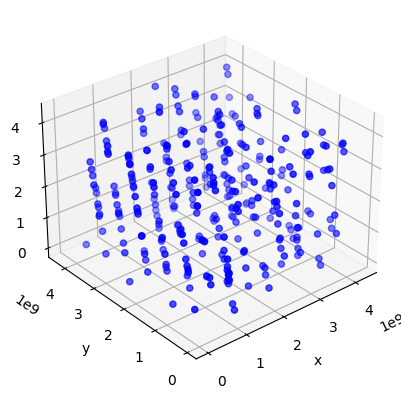

In [4]:
plt.figure()
ax = plt.axes(projection="3d")
x,y,z = split(rand_a(n,seed))
ax.scatter3D(x,y,z,c='b')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(30,-130) # hyperebenen gefunden

Text(0.5, 0, 'z')

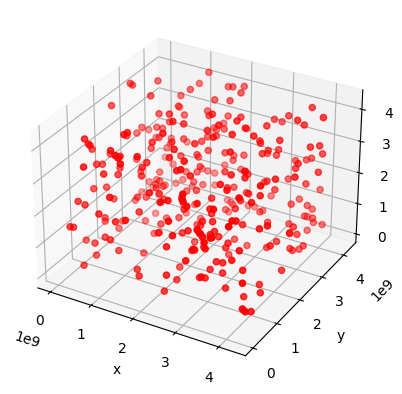

In [5]:
plt.figure()
ax = plt.axes(projection="3d")
x,y,z = split(rand_b(n,seed))
ax.scatter3D(x,y,z,c='r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# keine hyperebenen gefunden

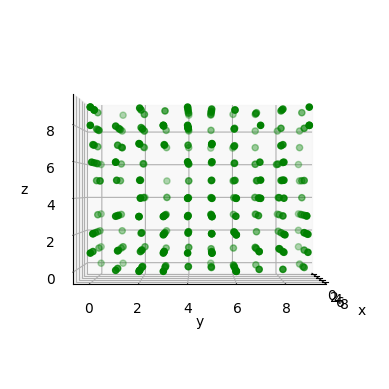

In [6]:
plt.figure()
ax = plt.axes(projection="3d")
x,y,z = split(rand_c(n))
ax.scatter3D(x,y,z,c='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(0,0) # keine hyperebenen gefunden (zufallszahlen sind nur 0-9)

Text(0.5, 0, 'z')

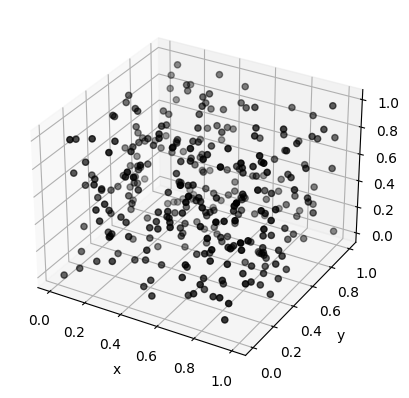

In [7]:
plt.figure()
ax = plt.axes(projection="3d")
x,y,z = split(rand_d(n))
ax.scatter3D(x,y,z,c='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# keine hyperebenen gefunden

we were only able to find regularities with method a) and c) (see pictures). but c) is only regular if we look from one side because all the numbers are integers from 0 to 9

### b) Bestimme fur alle PRNGs N = 100, 10000, 1000000 Zufallszahlen 
und berechne
$〈z_i〉$ und $〈z_i\cdot z_{i+1}〉$

 ### c) Überpruefe fur alle Falle von b), ob gilt
$〈z_i\cdot z_{i+1}〉= 〈z_i〉\cdot〈z_{i+1}〉$

In [8]:
numbers = [100,10_000,1_000_000]

In [9]:
def calcmeans(numbers,function,seed=1):
    for n in numbers:
        z = function(n,seed)
        print(f'N={n}: <z_i>={np.mean(z)}, <z_i*z_i+1>={np.mean(z[:-1]*z[1:])}')
        print(f'<z_i*z_i+1> - <z_i>*<z_i+1> = {np.mean(z[:-1]*z[1:]) - (np.mean(z[:-1])*np.mean(z[1:]))}')
        print()

In [10]:
print('a) RANDU')
calcmeans(numbers,rand_a)

a) RANDU
N=100: <z_i>=2042910550.32, <z_i*z_i+1>=4.3901388477670943e+18
<z_i*z_i+1> - <z_i>*<z_i+1> = 1.668064694600366e+17

N=10000: <z_i>=2150624916.4, <z_i*z_i+1>=4.626073016436817e+18
<z_i*z_i+1> - <z_i>*<z_i+1> = 309552206317568.0

N=1000000: <z_i>=2146041365.428096, <z_i*z_i+1>=4.6059967550448963e+18
<z_i*z_i+1> - <z_i>*<z_i+1> = 497710768621568.0



In [11]:
print('b) RAND')
calcmeans(numbers,rand_b)

b) RAND
N=100: <z_i>=2245171540.3, <z_i*z_i+1>=5.20520724464152e+18
<z_i*z_i+1> - <z_i>*<z_i+1> = 1.7591402309490176e+17

N=10000: <z_i>=2156536313.7368, <z_i*z_i+1>=4.648545641364708e+18
<z_i*z_i+1> - <z_i>*<z_i+1> = -1920322754278400.0

N=1000000: <z_i>=2147534470.304864, <z_i*z_i+1>=4.6101653758531497e+18
<z_i*z_i+1> - <z_i>*<z_i+1> = -1740424824492544.0



In [12]:
print('c) PI')
calcmeans(numbers,rand_c) # n = 1_000_000 dauert recht lange

c) PI
N=100: <z_i>=4.77, <z_i*z_i+1>=22.77777777777778
<z_i*z_i+1> - <z_i>*<z_i+1> = 0.04866850321395688

N=10000: <z_i>=4.4894, <z_i*z_i+1>=20.063906390639065
<z_i*z_i+1> - <z_i>*<z_i+1> = -0.09079632835770468

N=1000000: <z_i>=4.499934, <z_i*z_i+1>=20.23796923796924
<z_i*z_i+1> - <z_i>*<z_i+1> = -0.01146826537452128



In [13]:
print('d) random.random()')
calcmeans(numbers,rand_d)

d) random.random()
N=100: <z_i>=0.48262877974753154, <z_i*z_i+1>=0.23234701412768385
<z_i*z_i+1> - <z_i>*<z_i+1> = -0.0009924488465314352

N=10000: <z_i>=0.5018443539892884, <z_i*z_i+1>=0.25221037436768545
<z_i*z_i+1> - <z_i>*<z_i+1> = 0.0003478672663798643

N=1000000: <z_i>=0.4998185090184562, <z_i*z_i+1>=0.24980437713200102
<z_i*z_i+1> - <z_i>*<z_i+1> = -1.4277188083361425e-05

